In [2]:
import sys

In [2]:
print(sys.version)

3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


In [51]:
from pandas_datareader import data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pandas_datareader
print(pandas_datareader.__version__)
#import plotly.graph_objects as go

0.8.1


In [6]:
# Define the instruments to download. We would like to see Apple, Microsoft and others.
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC',
'Navistar': 'NAV',  
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
'American Express': 'AXP',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Toyota': 'TM',
'Honda': 'HMC',
'Mitsubishi': 'MSBHY',
'Sony': 'SNE',
'Exxon': 'XOM',
'Chevron': 'CVX',
'Valero Energy': 'VLO',
'Ford': 'F',
'Bank of America': 'BAC'}

companies = sorted(companies_dict.items(),key=lambda x:x[1])

print(companies)
print(len(companies))

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mitsubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]
27


In [22]:
data_source= 'yahoo'

start_date='2015-01-01'
end_date='2017-12-31'

#values=companies_dict.values()

#print(values)
print(list(companies_dict.values()))

panel_data = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)

print(panel_data.axes)

['AMZN', 'AAPL', 'WBA', 'NOC', 'BA', 'LMT', 'MCD', 'INTC', 'NAV', 'IBM', 'TXN', 'MA', 'MSFT', 'GE', 'AXP', 'PEP', 'KO', 'JNJ', 'TM', 'HMC', 'MSBHY', 'SNE', 'XOM', 'CVX', 'VLO', 'F', 'BAC']
[DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None), MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'GE', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSBHY', 'MSFT', 'NAV', 'NOC', 'PEP', 'SNE', 'TM', 'TXN', 'VLO', 'WBA', 'XOM']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
stock_close= panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AAPL     110.379997
AMZN     310.350006
AXP       93.040001
BA       129.979996
BAC       17.889999
CVX      112.180000
F         15.500000
GE        24.298077
HMC       29.520000
IBM      160.440002
INTC      36.290001
JNJ      104.570000
KO        42.220001
LMT      192.570007
MA        86.160004
MCD       93.699997
MSBHY     36.759998
MSFT      46.450001
NAV       33.480000
NOC      147.389999
PEP       94.559998
SNE       20.469999
TM       125.480003
TXN       53.470001
VLO       49.500000
WBA       76.199997
XOM       92.449997
Name: 2014-12-31 00:00:00, dtype: float64


In [27]:
stock_close=np.array(stock_close).T
stock_open=np.array(stock_open).T

print(stock_close)
print(stock_open)

row,col=stock_close.shape
print(row)
print(col)

movement=np.zeros([row,col])

for i in range(0,row):
    movement[i:]=np.subtract(stock_close[i:],stock_open[i:])
    
for i in range(0,len(companies)):
    print('Company:{}, Change:{}'.format(companies[i][0],sum(movement[i][:])))
    
print(movement.shape)

[[ 110.37999725  109.33000183  106.25       ...  170.6000061
   171.08000183  169.22999573]
 [ 310.3500061   308.51998901  302.19000244 ... 1182.26000977
  1186.09997559 1169.4699707 ]
 [  93.04000092   93.01999664   90.55999756 ...   99.12999725
    99.69999695   99.30999756]
 ...
 [  49.5          50.34000015   48.27000046 ...   92.13999939
    92.30000305   91.91000366]
 [  76.19999695   76.           74.5        ...   72.86000061
    72.94000244   72.62000275]
 [  92.44999695   92.83000183   90.29000092 ...   83.90000153
    84.01999664   83.63999939]]
[[ 112.81999969  111.38999939  108.29000092 ...  170.1000061
   171.          170.52000427]
 [ 311.54998779  312.57998657  307.01000977 ... 1179.91003418
  1189.         1182.34997559]
 [  94.65000153   93.16999817   92.45999908 ...   98.90000153
    99.63999939  100.        ]
 ...
 [  49.56000137   49.54999924   49.84000015 ...   91.81999969
    92.38999939   92.69000244]
 [  76.48999786   76.11000061   75.08000183 ...   73.33000183

C:\Users\Prasad\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


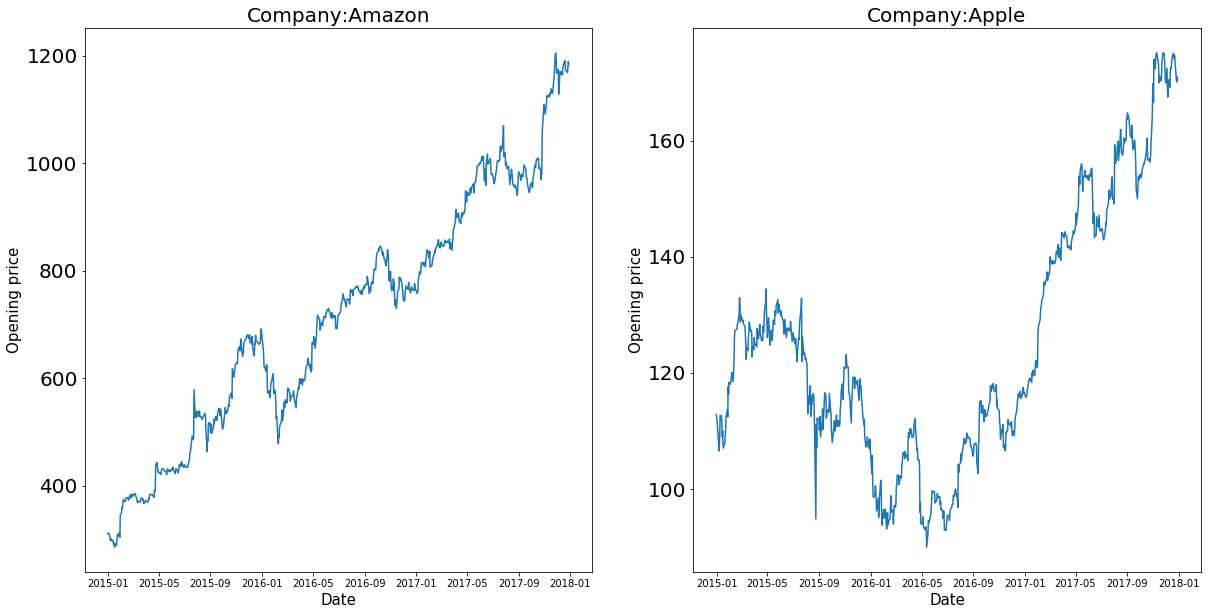

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Opening price',fontsize=15)
plt.plot(panel_data['Open']['AMZN'])
plt.subplot(1,2,2)
plt.title('Company:Apple',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Opening price',fontsize=15)
plt.plot(panel_data['Open']['AAPL'])

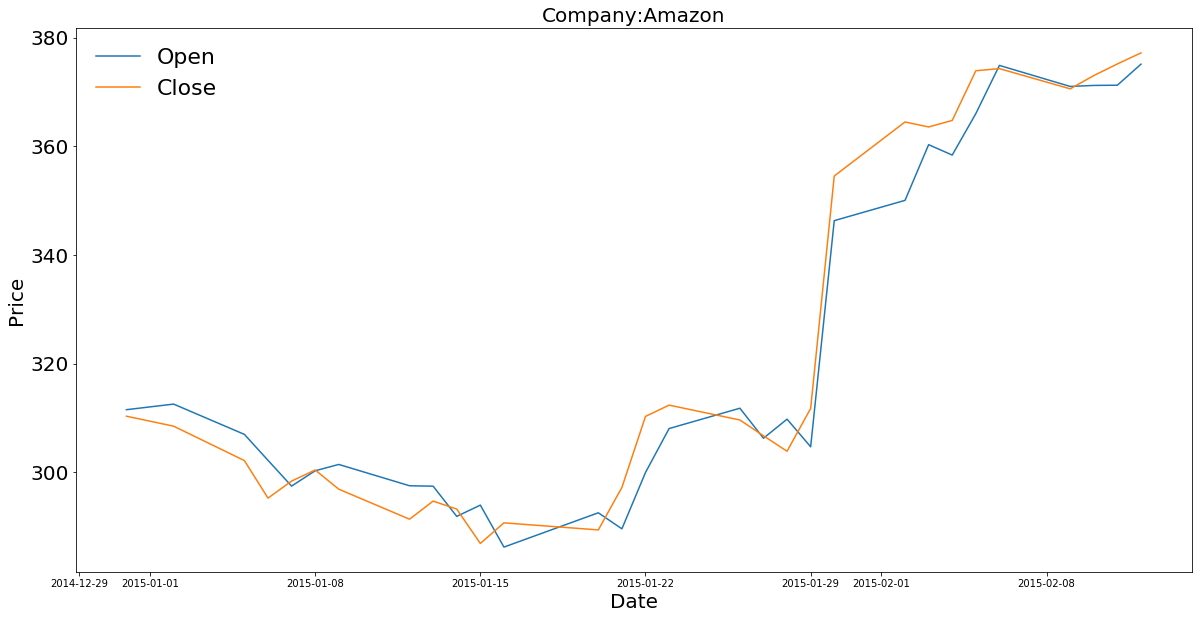

In [29]:
plt.figure(figsize=(20,10))
plt.title('Company:Amazon',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.plot(panel_data.iloc[0:30]['Open']['AMZN'],label='Open')
plt.plot(panel_data.iloc[0:30]['Close']['AMZN'],label='Close')
plt.legend(loc='upper left',frameon=False,framealpha=1,prop={'size':22})

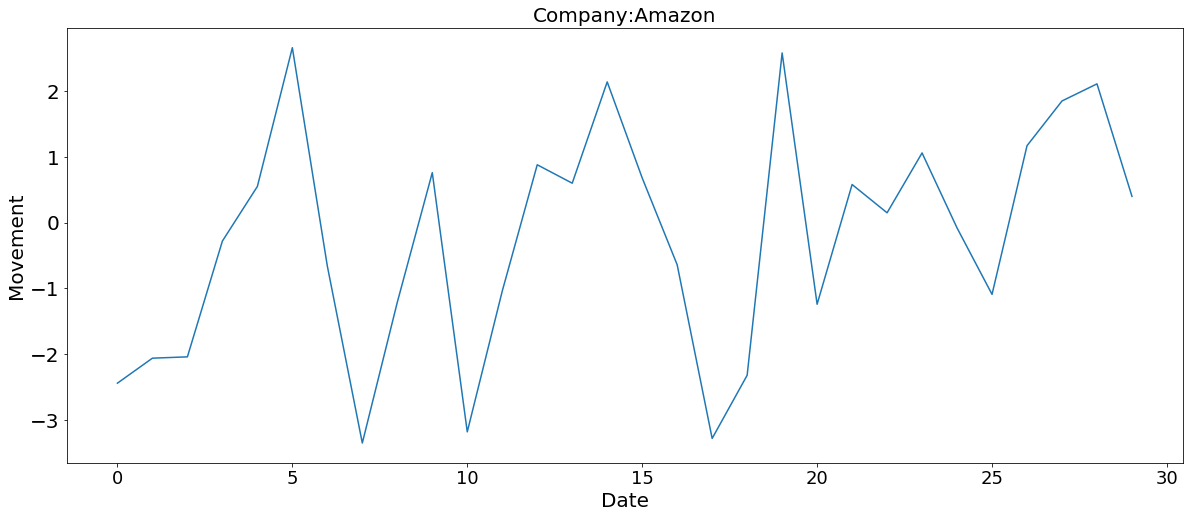

In [30]:
plt.figure(figsize = (20,8)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movement[0][0:30])

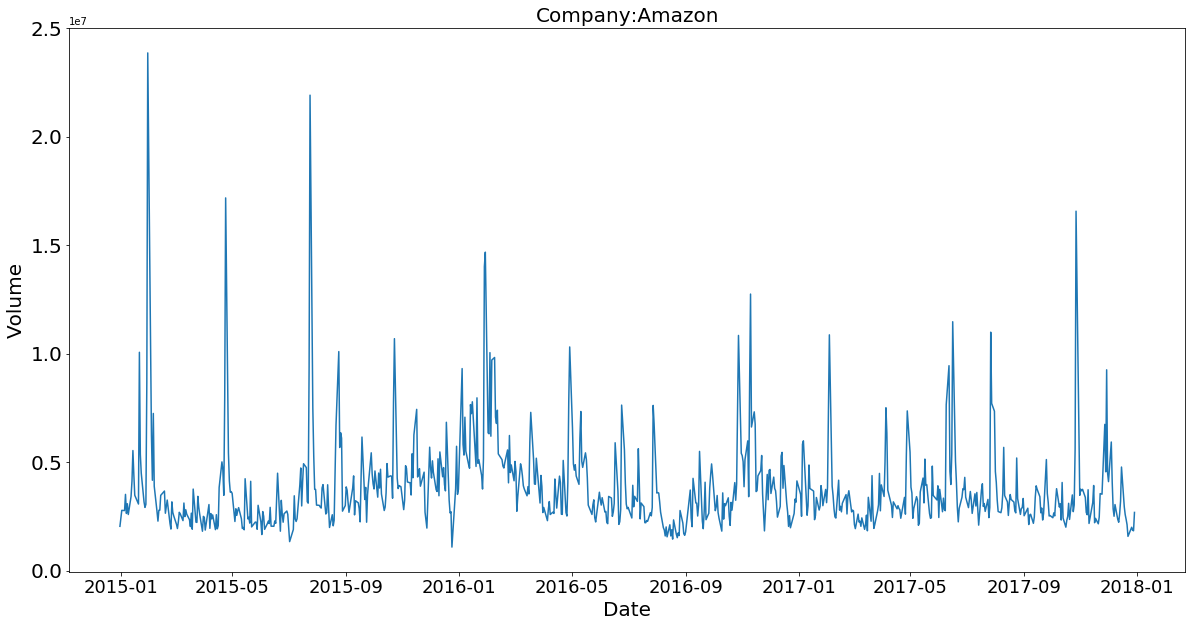

In [35]:
plt.figure(figsize = (20,10)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(panel_data['Volume']['AMZN'],label = 'Open')

In [39]:
#Normalization is needed as amazon has high movement as compared to other different companies simialrly among other companies movement range is quite vast so we require normalization.
#Import Normalizer

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

normalizer = Normalizer()
new=normalizer.fit_transform(movement)

#check min max and mean of the data after normalization.
print(new.max())
print(new.min())
print(new.mean())

#The minimum, maximum and mean value of ‘norm_movements’ are -0.259, 0.26 and 0.001. 
#All values are in range (-1,1) and mean is close to 0.

0.26029795916062815
-0.259844372052625
0.0010042172886527312


In [42]:
#Normalizer for use in pipeline
normalize =Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans=KMeans(n_clusters=10,max_iter=1000)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline=make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movement)

print(kmeans.inertia_)
#kmeans.inertia is used to check whether number of cluster is ok the lower the inertia the better the cluster number. But we can't make it too low such that inertia is close to 0
#kmeans.inertia_ gives the cost function score of K-Means clustering. 
#As number of clusters go up, the inertia score would go down.


9.093842682908356


In [46]:
# Predict the cluster labels: labels
labels=pipeline.predict(movement)

# Create a DataFrame aligning labels and companies: df
df=pd.DataFrame({'labels':labels,'Companies':companies})

# Display df sorted by cluster label
print(df.sort_values('labels',axis=0))

    labels                 Companies
9        0                (IBM, IBM)
23       1  (Texas Instruments, TXN)
10       1             (Intel, INTC)
24       2      (Valero Energy, VLO)
22       2              (Toyota, TM)
21       2               (Sony, SNE)
6        2                 (Ford, F)
7        2   (General Electrics, GE)
8        2              (Honda, HMC)
25       2           (Walgreen, WBA)
16       2       (Mitsubishi, MSBHY)
13       3    (Lockheed Martin, LMT)
3        3              (Boeing, BA)
19       3   (Northrop Grumman, NOC)
17       4         (Microsoft, MSFT)
0        4             (Apple, AAPL)
14       4          (MasterCard, MA)
1        4            (Amazon, AMZN)
5        5            (Chevron, CVX)
26       5              (Exxon, XOM)
18       6           (Navistar, NAV)
12       7           (Coca Cola, KO)
20       7              (Pepsi, PEP)
4        8    (Bank of America, BAC)
2        8   (American Express, AXP)
11       9  (Johnson & Johnson, JNJ)
1

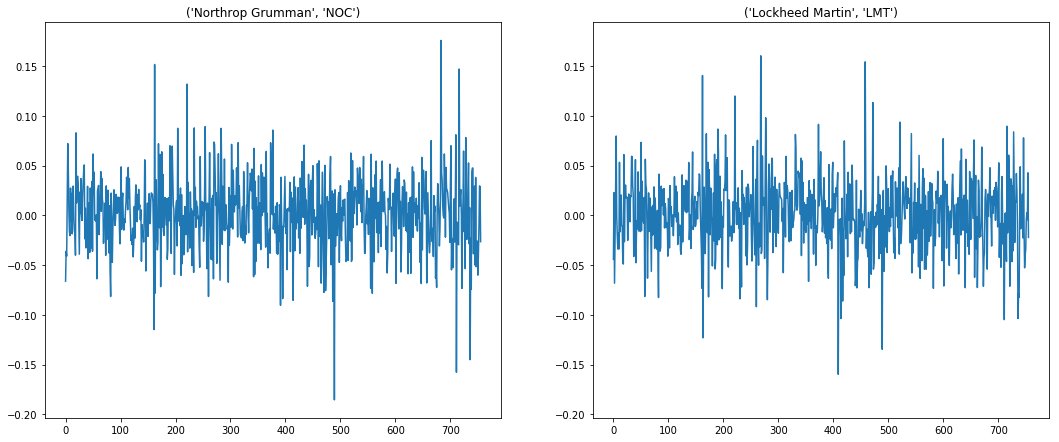

In [47]:
plt.clf
plt.figure(figsize=(18,16))
ax1=plt.subplot(221)
plt.plot(new[19][:])
plt.title(companies[19])

plt.subplot(222,sharey=ax1)
plt.plot(new[13][:])
plt.title(companies[13])
plt.show()


Soft drink manufacturers like Pepsi and Coca Cola, oil corporations like Chevron and Exxon, automotive manufacturers like Ford, Toyota, Honda, technology companies like Amazon, Apple, Microsoft, Intel and defence industries like Lockheed Martin, Boeing, Northrop Grumman are clustered together.
If the pipeline is run again, we get different cluster formation results as the beginning step of initialization of centroids is random in K-Means clustering.

PCA REDUCTION

The high dimensional data ‘norm_movement’ with 755 features(755 days) is reduced to a 2 dimensional data with 2 features(2days) and then k-means clustering is applied.
This way we can plot the clustered companies on a two dimensional graph.


    labels                 companies
4        0    (Bank of America, BAC)
18       0           (Navistar, NAV)
6        0                 (Ford, F)
13       1    (Lockheed Martin, LMT)
20       1              (Pepsi, PEP)
19       1   (Northrop Grumman, NOC)
12       1           (Coca Cola, KO)
11       1  (Johnson & Johnson, JNJ)
23       2  (Texas Instruments, TXN)
17       2         (Microsoft, MSFT)
14       2          (MasterCard, MA)
0        2             (Apple, AAPL)
1        2            (Amazon, AMZN)
5        3            (Chevron, CVX)
26       3              (Exxon, XOM)
8        4              (Honda, HMC)
2        4   (American Express, AXP)
22       4              (Toyota, TM)
24       4      (Valero Energy, VLO)
7        5   (General Electrics, GE)
25       6           (Walgreen, WBA)
3        6              (Boeing, BA)
15       7          (McDonalds, MCD)
21       8               (Sony, SNE)
10       8             (Intel, INTC)
9        9                (IBM, IBM)
1

<Figure size 432x288 with 0 Axes>

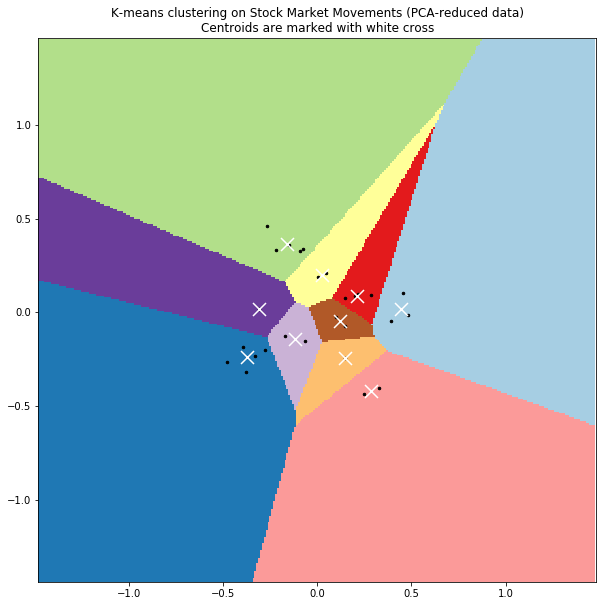

In [50]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space
#reduce the data
reduced_data= PCA(n_components=2).fit_transform(new)

#create Kmeans model
kmeans=KMeans(init='k-means++',n_clusters=10,n_init=10)
kmeans.fit(reduced_data)

labels =kmeans.predict(reduced_data)

#Create a dataframe aligning labels and companies:df
df=pd.DataFrame({'labels':labels,'companies': companies})

#Display df sorted by cluster label

print(df.sort_values('labels'))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max()+1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

#Define Colormap
cmap= plt.cm.Paired

plt.clf()
plt.figure(figsize=(10, 10))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
